# Deep Learning and Finance with PyTorch

#### By Pedro Izquierdo Lehmann

Welcome to ths hands-on introduction to PyTorch! This notebook will guide you through the fundamentals of PyTorch, from basic tensors to training a neural network.


Content:
- Working with PyTorch tensors
- Understanding automatic differentiation (autograd)
- Building neural networks
- Training a classifier on real data (CIFAR-10)
- Training a day to day finance classifier on data from HugginFace

Let's get started!


---
## (0. Environment Setup)

Before starting, you need to set up a Python virtual environment and install all required dependencies. Follow these steps:

#### 1. Create a Virtual Environment

Open your terminal and navigate to the **directory containing this notebook**, then run:

```bash
python3 -m venv pyTorchFinance
```

This creates a virtual environment in a folder called `pyTorchFinance`.

#### 2. Activate the Virtual Environment

**On macOS/Linux:**
```bash
source pyTorchFinance/bin/activate
```

**On Windows:**
```bash
pyTorchFinance\Scripts\activate
```

You should see `(pyTorchFinance)` at the beginning of your terminal prompt, indicating the virtual environment is active.

#### 3. Install Required Dependencies

With the virtual environment activated, install all necessary packages:

```bash
pip install torch torchvision datasets scikit-learn matplotlib pandas numpy jupyter ipykernel
```

This will install:
- `torch` and `torchvision` - PyTorch and computer vision utilities
- `datasets` - HuggingFace datasets library
- `scikit-learn` - Machine learning utilities (StandardScaler, train_test_split)
- `matplotlib` - Plotting library
- `pandas` - Data manipulation
- `numpy` - Numerical computing
- `jupyter` - Jupyter notebook environment
- `ipykernel` - Jupyter kernel for the virtual environment

Register the virtual environment as a Jupyter kernel:

```bash
python -m ipykernel install --user --name=pyTorchFinance --display-name "Python (pyTorchFinance)"
```

This ensures Jupyter can use your virtual environment's Python interpreter.

#### 4. Start Jupyter Notebook

We recommend two options to run the notebook:

**Jupyter Notebook:**

```bash
jupyter notebook
```

This will open Jupyter in your web browser. Navigate to and open this notebook (`pytorch.ipynb`).

**Code Editor like VS Code or Cursor:**

1. Open the notebook file (`pytorch.ipynb`) in your code editor
2. The editor should automatically detect it as a Jupyter notebook
3. When prompted to select a kernel, choose **Python (pyTorchFinance)** from the list
4. If the kernel doesn't appear, you may need to refresh the kernel list or ensure the virtual environment is properly registered

#### 5. Deactivate

Don't forget to deactivate the virtual environment when you're done working with the following command:

```bash
deactivate
```


In [ ]:
# python3 -m venv pyTorchFinance
# source pyTorchFinance/bin/activate 
# pyTorchFinance\Scripts\activate
# pip install torch torchvision datasets scikit-learn matplotlib pandas numpy jupyter ipykernel``
# python -m ipykernel install --user --name=pyTorchFinance --display-name "Python (pyTorchFinance)"
# jupyter notebook

---

## 1. What is PyTorch?

PyTorch is a Python-based scientific computing package that serves two main purposes:

1. **A replacement for NumPy** to use the power of GPUs and other accelerators
2. **An automatic differentiation library** that is useful for implementing neural networks

PyTorch provides a flexible and intuitive interface for deep learning research and production. Let's start importing it, and checking if GPU sources are available in your computer. If they are not, don't worry, we can continue anyway using your CPU.


In [1]:
import torch
import numpy as np

# Check PyTorch version
print(f"PyTorch version: {torch.__version__}")

# Check if CUDA (GPU) is available
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA device: {torch.cuda.get_device_name(0)}")

PyTorch version: 2.9.1
CUDA available: False


In [2]:
print(torch.backends.mps.is_available())

True


## 2. Tensors

Tensors are the fundamental data structure in PyTorch. Basically, they are arrays of numbers; similar to NumPy arrays but with GPU acceleration support.


### Creating Tensors

Tensors can be created in many ways, similar to NumPy arrays. Let's explore different ways to create tensors.


In [3]:
# Create a tensor from a Python list
x = torch.tensor([1, 2, 3, 4, 5])
print("Tensor from list:", x)
print("Shape:", x.shape)
print("Data type:", x.dtype)

# Create a tensor of zeros
zeros = torch.zeros(3, 4)
print("\nZeros tensor:")
print(zeros)

# Create a tensor of ones
ones = torch.ones(2, 3)
print("\nOnes tensor:")
print(ones)

# Create a tensor with random values
random_tensor = torch.randn(3, 3)
print("\nRandom tensor:")
print(random_tensor)


Tensor from list: tensor([1, 2, 3, 4, 5])
Shape: torch.Size([5])
Data type: torch.int64

Zeros tensor:
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

Ones tensor:
tensor([[1., 1., 1.],
        [1., 1., 1.]])

Random tensor:
tensor([[-1.8258, -1.0765, -2.0422],
        [ 1.6094,  0.6566, -1.8208],
        [ 1.2208, -0.7759,  0.4713]])


### Exercise 1: Creating Tensors

Create the following tensors:
1. A tensor with shape (2, 3) filled with the value 5.0
2. A tensor with shape (4, 4) filled with random values between 0 and 1
3. A tensor from the NumPy array `np.array([1, 2, 3, 4])`


In [4]:
# EXERCISE: Create a tensor with shape (2, 3) filled with 5.0
# Hint: Use torch.full() or torch.ones() * 5
tensor1 = torch.full((2, 3), 5.0)  # TODO: Fill this in
print("Tensor 1:", tensor1)

# EXERCISE: Create a tensor with shape (4, 4) with random values between 0 and 1
# Hint: Use torch.rand()
tensor2 = torch.randn(4, 4)  # TODO: Fill this in
print("\nTensor 2:")
print(tensor2)

# EXERCISE: Create a tensor from a NumPy array
# Hint: Use torch.from_numpy()
numpy_array = np.array([1, 2, 3, 4])
tensor3 = torch.from_numpy(numpy_array) # TODO: Fill this in
print("\nTensor 3:", tensor3)


Tensor 1: tensor([[5., 5., 5.],
        [5., 5., 5.]])

Tensor 2:
tensor([[ 3.8520,  0.3591, -0.0083,  0.5089],
        [ 0.6142, -0.8444,  0.7622, -0.1809],
        [-0.1815, -1.6427, -1.3928, -2.5493],
        [-1.1017, -0.7365,  0.0275, -0.5249]])

Tensor 3: tensor([1, 2, 3, 4])


### Tensor Operations

Tensors support many operations similar to NumPy arrays. Let's explore some common operations.


In [5]:
# Create two tensors
a = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
b = torch.tensor([[5, 6], [7, 8]], dtype=torch.float32)

print("Tensor a:")
print(a)
print("\nTensor b:")
print(b)

# Element-wise operations
print("\nAddition:")
print(a + b)

print("\nMultiplication (element-wise):")
print(a * b)

print("\nMatrix multiplication:")
print(torch.matmul(a, b))
# Or using @ operator
print(a @ b)

# Reshaping
print("\nReshape a to (1, 4):")
print(a.reshape(1, 4))
print("Or flatten:")
print(a.flatten())


Tensor a:
tensor([[1., 2.],
        [3., 4.]])

Tensor b:
tensor([[5., 6.],
        [7., 8.]])

Addition:
tensor([[ 6.,  8.],
        [10., 12.]])

Multiplication (element-wise):
tensor([[ 5., 12.],
        [21., 32.]])

Matrix multiplication:
tensor([[19., 22.],
        [43., 50.]])
tensor([[19., 22.],
        [43., 50.]])

Reshape a to (1, 4):
tensor([[1., 2., 3., 4.]])
Or flatten:
tensor([1., 2., 3., 4.])


### Exercise 2: Tensor Operations

1. Create two tensors `x` and `y` of shape (3, 2) with random values
2. Compute their element-wise sum, difference, and product
3. Reshape `x` to shape (2, 3)
4. Compute the mean and standard deviation of `x`


In [6]:
# EXERCISE: Create two tensors x and y of shape (3, 2) with random values
# Hint: Use torch.randn()
x = torch.randn(3,2)  # TODO: Fill this in
y = torch.randn(3,2)  # TODO: Fill this in

print("x:", x)
print("y:", y)

# EXERCISE: Compute element-wise sum, difference, and product
sum_result = x+y  # TODO: Fill this in
diff_result = x-y  # TODO: Fill this in
prod_result = x*y  # TODO: Fill this in

print("\nSum:", sum_result)
print("Difference:", diff_result)
print("Product:", prod_result)

# EXERCISE: Reshape x to shape (2, 3)
# Hint: Use x.reshape()
x_reshaped = x.reshape(2,3)  # TODO: Fill this in
print("\nReshaped x:", x_reshaped)

# EXERCISE: Compute mean and standard deviation of x
# Hint: Use x.mean() and x.std()
x_mean = x.mean()  # TODO: Fill this in
x_std = x.std()  # TODO: Fill this in
print("\nMean of x:", x_mean)
print("Std of x:", x_std)


x: tensor([[ 1.7887,  0.8162],
        [-0.5666,  1.2051],
        [-1.5545,  0.4728]])
y: tensor([[ 2.6783, -0.3318],
        [ 0.0550,  0.0054],
        [ 0.4948,  0.3256]])

Sum: tensor([[ 4.4670,  0.4843],
        [-0.5116,  1.2105],
        [-1.0597,  0.7984]])
Difference: tensor([[-0.8896,  1.1480],
        [-0.6216,  1.1998],
        [-2.0493,  0.1472]])
Product: tensor([[ 4.7907, -0.2708],
        [-0.0312,  0.0065],
        [-0.7692,  0.1540]])

Reshaped x: tensor([[ 1.7887,  0.8162, -0.5666],
        [ 1.2051, -1.5545,  0.4728]])

Mean of x: tensor(0.3603)
Std of x: tensor(1.2248)


### Converting Between NumPy and PyTorch

PyTorch tensors can be easily converted to and from NumPy arrays. This is useful when working with existing NumPy code.


In [7]:
# Create a NumPy array
numpy_array = np.array([1, 2, 3, 4, 5])
print("NumPy array:", numpy_array)

# Convert NumPy to PyTorch tensor
torch_tensor = torch.from_numpy(numpy_array)
print("PyTorch tensor:", torch_tensor)

# Convert PyTorch tensor to NumPy
back_to_numpy = torch_tensor.numpy()
print("Back to NumPy:", back_to_numpy)

# Note: If the tensor is on GPU, you need to move it to CPU first
# tensor_cpu = tensor_gpu.cpu().numpy()


NumPy array: [1 2 3 4 5]
PyTorch tensor: tensor([1, 2, 3, 4, 5])
Back to NumPy: [1 2 3 4 5]


## 3. Automatic Differentiation with torch.autograd

One of PyTorch's most powerful features is automatic differentiation. This allows us to compute gradients automatically, which is essential for training neural networks.

The key concept is that when you create a tensor with `requires_grad=True`, PyTorch tracks all operations on that tensor and can compute gradients automatically.


In [8]:
# Create a tensor that requires gradient computation
x = torch.tensor([2.0], requires_grad=True)
print("x:", x)
print("requires_grad:", x.requires_grad)

# Define a simple function: y = x^2
y = x ** 2
print("\ny = x^2:", y)

# Compute the gradient
y.backward()  # This computes dy/dx

# Access the gradient
print("\nGradient dy/dx:", x.grad)
print("Expected: 2*x = 2*2 = 4")


x: tensor([2.], requires_grad=True)
requires_grad: True

y = x^2: tensor([4.], grad_fn=<PowBackward0>)

Gradient dy/dx: tensor([4.])
Expected: 2*x = 2*2 = 4


### Understanding the Computational Graph

When you perform operations on tensors with `requires_grad=True`, PyTorch builds a computational graph; this is automatic differentiation in action. This graph is used to compute gradients using the chain rule (backpropagation). As an example, consider the expression `e = (a + b) ∗ (b + 1)`, with values  `a = 2`, `b = 1`. We can draw the evaluated computation graph as


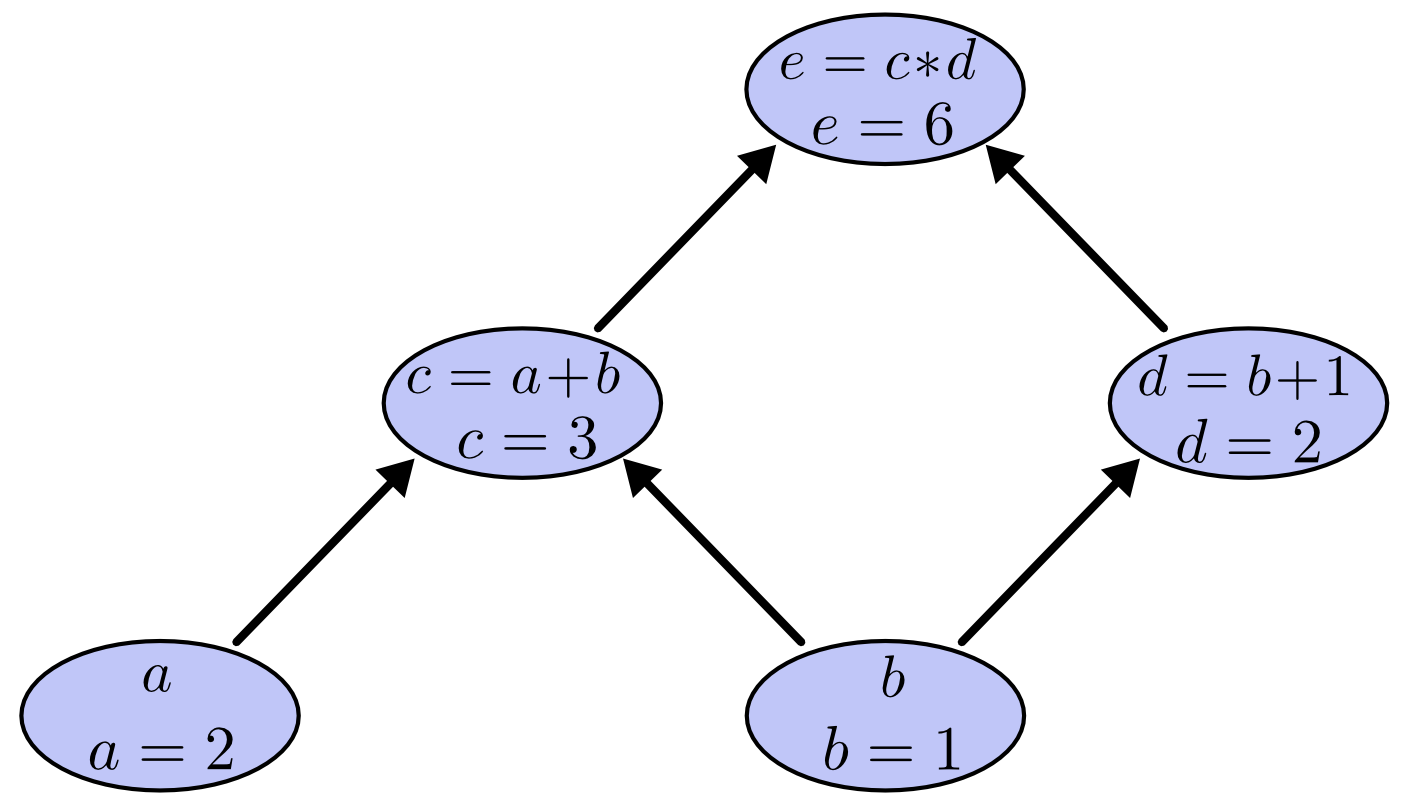

In [9]:
# Create tensors with requires_grad=True
a = torch.tensor([3.0], requires_grad=True)
b = torch.tensor([4.0], requires_grad=True)

# Build a computational graph: c = a * b, d = c^2
c = a * b
d = c ** 2

print("a:", a.item())
print("b:", b.item())
print("c = a * b:", c.item())
print("d = c^2:", d.item())

# Compute gradients
d.backward()

print("\nGradients:")
print("∂d/∂a:", a.grad.item())  # Should be 2*a*b^2 = 2*3*16 = 96
print("∂d/∂b:", b.grad.item())  # Should be 2*a^2*b = 2*9*4 = 72


a: 3.0
b: 4.0
c = a * b: 12.0
d = c^2: 144.0

Gradients:
∂d/∂a: 96.0
∂d/∂b: 72.0


### Exercise 3: Computing Gradients

1. Create a tensor `x` with value 5.0 that requires gradients
2. Compute `y = 3*x^2 + 2*x + 1`
3. Compute the gradient of y with respect to x
4. Verify that the gradient is `6*x + 2 = 6*5 + 2 = 32`


In [11]:
# EXERCISE: Create tensor x with value 5.0 that requires gradients
# Hint: use torch.tensor with requires_grad=True
x = torch.tensor([5.0], requires_grad=True)  # TODO: Fill this in

# EXERCISE: Compute y = 3*x^2 + 2*x + 1
y = 3*x**2 + 2*x + 1  # TODO: Fill this in

print("x:", x.item())
print("y:", y.item())

# EXERCISE: Compute the gradient
# TODO: Fill this in (call backward on y)
y.backward()
# EXERCISE: Access and print the gradient
# Hint: use x.grad
gradient = x.grad  # TODO: Fill this in
print("\nGradient dy/dx:", gradient)
print("Expected: 6*x + 2 =", 6 * x.item() + 2)


x: 5.0
y: 86.0

Gradient dy/dx: tensor([32.])
Expected: 6*x + 2 = 32.0


### Important: Recomputing gradients

Saved intermediate values of a PyTorch computational graph are freed when you call `.backward()` or `autograd.grad()`. Specify `retain_graph=True` if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In many cases, as in training, you will **not** need to backward through the graph a second time, but to backward through a **new function of the tensor**, which builds a new graph. In that case, you need to zero the gradients before each backward pass, otherwise gradients accumulate. 


In [12]:
x = torch.tensor([2.0], requires_grad=True)

# First computation
y1 = x ** 2
y1.backward()
print("After first backward:", x.grad.item())

# Trying to call .backward() again will fail:
try:
    y1.backward()
except Exception as e:
    print(f'(Exception: {e})')

# Retaining the graph allows us to backwards many times.
x = torch.tensor([2.0], requires_grad=True)
y1 = x ** 2
y1.backward(retain_graph=True)
print("After first backward:", x.grad.item())
y1.backward()
print("After second backward:", x.grad.item())

# Gradients are accumulating. Even if you define a new function of x.
y2 = x ** 2
y2.backward(retain_graph=True)
print("After third backward (over new function of x):", x.grad.item())

# Zero the gradients
x.grad.zero_()
print("After zeroing:", x.grad.item())

# Now compute again
y2.backward()
print("After third backward (after zeroing):", x.grad.item())

After first backward: 4.0
(Exception: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.)
After first backward: 4.0
After second backward: 8.0
After third backward (over new function of x): 12.0
After zeroing: 0.0
After third backward (after zeroing): 4.0


## 4. Neural Networks

Now let's build neural networks using PyTorch's `nn` module. PyTorch provides a high-level API for building neural networks that makes it easy to define complex architectures.


In [2]:
import torch.nn as nn
import torch.nn.functional as F

# Define a simple neural network
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        # Define layers
        self.fc1 = nn.Linear(10, 5)  # Fully connected layer: 10 inputs, 5 outputs
        self.fc2 = nn.Linear(5, 1)   # Fully connected layer: 5 inputs, 1 output
    
    def forward(self, x):
        # Define the forward pass
        x = F.relu(self.fc1(x))  # Apply ReLU activation
        x = self.fc2(x)
        return x

# Create an instance of the network
net = SimpleNet()
print(net)

# Create some dummy input
input_data = torch.randn(1, 10)  # Batch size 1, 10 features
print("\nInput shape:", input_data.shape)

# Forward pass
output = net(input_data)
print("Output shape:", output.shape)
print("Output:", output)


SimpleNet(
  (fc1): Linear(in_features=10, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=1, bias=True)
)

Input shape: torch.Size([1, 10])
Output shape: torch.Size([1, 1])
Output: tensor([[-0.0703]], grad_fn=<AddmmBackward0>)


Let's examine the parameters of our network:


In [14]:
# Access network parameters
for name, param in net.named_parameters():
    print(f"{name}: shape {param.shape}")
    print(f"  Values: {param.data}\n")

# Count total parameters
total_params = sum(p.numel() for p in net.parameters())
print(f"Total parameters: {total_params}")


fc1.weight: shape torch.Size([5, 10])
  Values: tensor([[-0.3029, -0.1665, -0.1343,  0.1356,  0.0606, -0.0800,  0.0237, -0.0080,
          0.0474,  0.0243],
        [-0.0256, -0.0987,  0.2581,  0.1069, -0.2775, -0.0965, -0.2351, -0.0177,
         -0.0396, -0.1255],
        [-0.2547, -0.2530, -0.0879,  0.2503,  0.2838, -0.0322, -0.0163,  0.2816,
         -0.2162, -0.2423],
        [-0.1630,  0.2185,  0.1747, -0.1105, -0.1013,  0.1335, -0.2993, -0.2931,
          0.2804,  0.1797],
        [ 0.0823,  0.2415, -0.0911,  0.1801, -0.1352,  0.2357,  0.1676,  0.0467,
          0.2616,  0.2012]])

fc1.bias: shape torch.Size([5])
  Values: tensor([ 0.1061, -0.0760,  0.0286, -0.1042, -0.2291])

fc2.weight: shape torch.Size([1, 5])
  Values: tensor([[-0.2633,  0.3460,  0.0967, -0.4092, -0.2693]])

fc2.bias: shape torch.Size([1])
  Values: tensor([-0.1044])

Total parameters: 61


### Exercise 4: Building a Neural Network

Create a neural network with:
1. An input layer that accepts 8 features
2. A hidden layer with 16 neurons and ReLU activation
3. Another hidden layer with 8 neurons and ReLU activation
4. An output layer with 3 neurons (for 3-class classification)

Then create a random input tensor of shape (batch_size=4, features=8) and pass it through the network.


In [15]:
# EXERCISE: Define a neural network class
class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        # TODO: Define your layers here
        # Hint: Use nn.Linear() for fully connected layers
        self.fc1 = nn.Linear(8, 16)  # TODO: Input layer (8 -> 16)
        self.fc2 = nn.Linear(16, 8) # TODO: Hidden layer (16 -> 8)
        self.fc3 = nn.Linear(8, 3)  # TODO: Output layer (8 -> 3)
    
    def forward(self, x):
        # TODO: Define the forward pass. Apply ReLU activation after fc1 and fc2. Don't apply ReLU activation after fc3 (output layer).
        # Hint: Use F.relu()
        x = F.relu(self.fc1(x)) # TODO: Fill this in
        x = F.relu(self.fc2(x))  # TODO: Fill this in
        x = self.fc3(x)  # TODO: Fill this in
        return x

# EXERCISE: Create an instance of your network
# Hint: Use MyNet()
my_net = MyNet()  # TODO: Fill this in

# EXERCISE: Create input tensor with batch_size=4, features=8
# Hint: Use torch.randn()
input_tensor = torch.randn(4,8)  # TODO: Fill this in

# EXERCISE: Forward pass
output = my_net(input_tensor) # TODO: Fill this in

print("Network architecture:")
print(my_net)
print(f"\nInput shape: {input_tensor.shape}")
print(f"Output shape: {output.shape}")
print(f"Output:\n{output}")


Network architecture:
MyNet(
  (fc1): Linear(in_features=8, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=3, bias=True)
)

Input shape: torch.Size([4, 8])
Output shape: torch.Size([4, 3])
Output:
tensor([[ 0.0577,  0.0734, -0.2383],
        [ 0.0959,  0.0595, -0.2019],
        [ 0.1133,  0.0387, -0.2108],
        [ 0.2027,  0.0254, -0.2157]], grad_fn=<AddmmBackward0>)


## 5. Training an Image Classifier with Convolutional Neural Networks

Now let's put everything together and train a neural network to classify images. We'll use the CIFAR-10 dataset, which contains 60,000 32x32 color images in 10 classes.


First we run the following code to avoid the SSL certificate error (`URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED]...>`) when downloading datasets.


In [3]:
import ssl
import os
os.environ['PYTHONHTTPSVERIFY'] = '0'
ssl._create_default_https_context = ssl._create_unverified_context

Now we downlowad the CIFAR-10 dataset.

In [4]:
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms

# Define data transformations
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL image to tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to [-1, 1]
])

# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=True, 
    download=True, 
    transform=transform
)

# Get some random training images
trainloader = DataLoader(
    trainset, 
    batch_size=10, 
    shuffle=True, 
    num_workers=2
)

dataiter = iter(trainloader)
images, labels = next(dataiter)

print("Image batch shape:", images.shape)
print("Labels:", labels)
print("Label names:", [trainset.classes[label] for label in labels])


/Users/ywo/Desktop/financial-computing-workshop/pyTorchFinance/lib/python3.11/site-packages/torchvision/datasets/cifar.py:83: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  entry = pickle.load(f, encoding="latin1")


Image batch shape: torch.Size([10, 3, 32, 32])
Labels: tensor([4, 4, 8, 5, 2, 5, 2, 9, 1, 9])
Label names: ['deer', 'deer', 'ship', 'dog', 'bird', 'dog', 'bird', 'truck', 'automobile', 'truck']


### Define a CNN for Image Classification

For image classification, we'll use a Convolutional Neural Network (CNN), which is better suited for image data than fully connected networks.


In [7]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 6, 5)  # 3 input channels, 6 output channels, 5x5 kernel
        self.pool = nn.MaxPool2d(2, 2)   # 2x2 max pooling
        self.conv2 = nn.Conv2d(6, 16, 5)  # 6 input channels, 16 output channels, 5x5 kernel
        
        # Fully connected layers
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # After conv and pooling, image is 5x5
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)  # 10 classes for CIFAR-10
    
    def forward(self, x):
        # First conv block
        x = self.pool(F.relu(self.conv1(x)))  # Conv -> ReLU -> Pool
        # Second conv block
        x = self.pool(F.relu(self.conv2(x)))  # Conv -> ReLU -> Pool
        
        # Flatten for fully connected layers
        x = x.view(-1, 16 * 5 * 5)
        
        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)  # No activation on output (we'll use CrossEntropyLoss)
        return x

# Create the network
net = CNN()
print(net)


CNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


### Define Loss Function and Optimizer

To train a neural network, we need:
1. **Loss function**: Measures how far off our predictions are
2. **Optimizer**: Updates the network weights to minimize the loss


In [8]:
# Loss function: CrossEntropyLoss is commonly used for classification
criterion = nn.CrossEntropyLoss()

# Optimizer: Stochastic Gradient Descent (SGD)
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Alternative optimizers you might use:
# optimizer = optim.Adam(net.parameters(), lr=0.001)
# optimizer = optim.RMSprop(net.parameters(), lr=0.001)

print("Loss function:", criterion)
print("Optimizer:", optimizer)


Loss function: CrossEntropyLoss()
Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)


### Exercise 5: Understanding the Training Loop

Complete the training loop. The training process consists of:
1. Forward pass: Get predictions from the network
2. Compute loss: Compare predictions with true labels
3. Backward pass: Compute gradients
4. Update weights: Use optimizer to update network parameters

Fill in the missing parts of the training loop.


In [9]:
# Training loop for 10 epochs (full passes through the dataset)
# Note: This is a simplified example. In practice, you'd train for more epochs.

for epoch in range(10):  # Loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        
        # EXERCISE: Zero the parameter gradients
        # Hint: use optimizer.zero_grad()
        # TODO: Fill this in
        optimizer.zero_grad()
        # EXERCISE: Forward pass (pass inputs through the network)
        outputs = net(inputs)   # TODO: Fill this in
        
        # EXERCISE: Compute loss (use criterion to compute loss between outputs and labels)
        loss = criterion(outputs, labels)    # TODO: Fill this in
        
        # EXERCISE: Backward pass (call backward on loss)
        # TODO: Fill this in
        loss.backward()
        # EXERCISE: Update weights
        # Hint: use optimizer.step()
        # TODO: Fill this in
        optimizer.step()
        # Print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:  # Print every 2000 mini-batches
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] Loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')


[Epoch 1, Batch 2000] Loss: 2.219
[Epoch 1, Batch 4000] Loss: 1.833
[Epoch 2, Batch 2000] Loss: 1.543
[Epoch 2, Batch 4000] Loss: 1.455
[Epoch 3, Batch 2000] Loss: 1.319
[Epoch 3, Batch 4000] Loss: 1.262
[Epoch 4, Batch 2000] Loss: 1.165
[Epoch 4, Batch 4000] Loss: 1.147
[Epoch 5, Batch 2000] Loss: 1.074
[Epoch 5, Batch 4000] Loss: 1.071
[Epoch 6, Batch 2000] Loss: 1.010
[Epoch 6, Batch 4000] Loss: 1.009
[Epoch 7, Batch 2000] Loss: 0.943
[Epoch 7, Batch 4000] Loss: 0.962
[Epoch 8, Batch 2000] Loss: 0.897
[Epoch 8, Batch 4000] Loss: 0.910
[Epoch 9, Batch 2000] Loss: 0.857
[Epoch 9, Batch 4000] Loss: 0.870
[Epoch 10, Batch 2000] Loss: 0.808
[Epoch 10, Batch 4000] Loss: 0.836
Finished Training


### Testing the Trained Model

Let's test our trained model on some test images to see how well it performs.


In [10]:
# Load test dataset
testset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=False, 
    download=True, 
    transform=transform
)

# Get some test images
batch_size = 10
testloader = DataLoader(
    testset, 
    batch_size=batch_size, 
    shuffle=False, 
    num_workers=2
)

dataiter = iter(testloader)
images, labels = next(dataiter)

# Make predictions
outputs = net(images)

# Get predicted classes (the class with highest score)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{testset.classes[predicted[j]]:5s}' for j in range(10)))
print('Actual:    ', ' '.join(f'{testset.classes[labels[j]]:5s}' for j in range(10)))


Predicted:  cat   ship  ship  airplane frog  frog  cat   bird  cat   truck
Actual:     cat   ship  ship  airplane frog  frog  automobile frog  cat   automobile


### Exercise 6: Computing Accuracy

Compute the accuracy of the model on the entire test set. Loop through all test batches, make predictions, and calculate what percentage of predictions are correct.


In [11]:
correct = 0
total = 0

# Set network to evaluation mode (affects dropout, batch norm, etc.)
net.eval()

with torch.no_grad():  # Don't compute gradients during testing
    for data in testloader:
        images, labels = data
        
        # EXERCISE: Get predictions (forward pass through network)
        outputs = net(images)  # TODO: Fill this in
        
        # EXERCISE: Get predicted classes
        # Hint: Use torch.max() to get the class with highest score
        _, predicted = torch.max(outputs, 1) # TODO: Fill this in
        
        # EXERCISE: Count correct predictions
        correct += (predicted == labels).sum().item() # TODO: Fill this in (count correct predictions)

total = len(testloader) * batch_size

# EXERCISE: Calculate and print accuracy using variables correct and total
accuracy = 100 * correct / total # TODO: Fill this in
print(f'Accuracy on test set: {accuracy:.2f}%')


Accuracy on test set: 63.30%


You might want to save your trained models:


In [12]:
# Save the entire model
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)
print(f"Model saved to {PATH}")

# To load the model later:
# net = CNN()  # Create the same architecture
# net.load_state_dict(torch.load(PATH))
# net.eval()  # Set to evaluation mode


Model saved to ./cifar_net.pth


## 6. Building a Daily Trading Decision Classifier

In this application exercise, you'll build a classifier that decides whether to buy or not to buy based on stock market data. The classifier will be applied sequentially in time to simulate daily trading decisions at the beginning of each day.

The exercise consists on:

1. **Load financial data** from HuggingFace datasets
2. **Preprocess market data** to extract meaningful features (bid, ask, spread, returns, etc.)
3. **Build a binary classifier** to predict buy/no-buy decisions
4. **Train the model** using PyTorch's training loop
5. **Apply the classifier sequentially** in time to simulate real trading

Disclaimer:
- This is a simplified example for educational purposes
- Real trading involves transaction costs, slippage, and market impact
- More sophisticated features (technical indicators, market microstructure) can improve performance
- Risk management and position sizing are crucial in real trading
- Past performance doesn't guarantee future results

### Understanding the Problem

In daily trading, traders make buy/sell decisions at the beginning of each day based on:
- **Open price**: The price at the start of the trading day
- **High price**: The highest price during the day
- **Low price**: The lowest price during the day
- **Close price**: The price at the end of the trading day
- **Volume**: The number of shares traded during the day
- **Price movements and trends**: Historical price patterns

Our classifier will analyze these daily features and predict whether to buy (1) or not buy (0) at the beginning of each trading day.


### Loading Financial Data from HuggingFace

We'll use the `datasets` library to load financial data. Let's start by installing and importing the necessary libraries.


In [5]:
from datasets import load_dataset
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load a financial dataset from HuggingFace
try:
    # Load sebdg/trading_data dataset from HuggingFace
    # Dataset: https://huggingface.co/datasets/sebdg/trading_data
    dataset = load_dataset('sebdg/trading_data', split='train[:5000]')
    print("Dataset loaded successfully!")
    print(f"Dataset features: {dataset.features}")
except Exception as e:
    print(f"Error loading dataset: {e}")
    print("Please check your internet connection and SSL settings.")
    raise


Dataset loaded successfully!
Dataset features: {'Open': Value('float64'), 'High': Value('float64'), 'Low': Value('float64'), 'Close': Value('float64'), 'Adj Close': Value('float64'), 'Volume': Value('float64'), 'File': Value('string'), 'Date': Value('string')}


### Data Preprocessing

We need to convert the dataset into a format suitable for our classifier. We'll create features from the market data and labels (buy/not buy) based on future price movements.


In [73]:
# Convert dataset to DataFrame if it's not already
if isinstance(dataset, pd.DataFrame):
    df = dataset.copy()
else:
    df = pd.DataFrame(dataset)

# The dataset has capitalized column names, so we'll normalize them to lowercase
# Columns: Open, High, Low, Close, Adj Close, Volume, File, Date
df.columns = df.columns.str.lower()


# Display basic information
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nColumn names:", df.columns.tolist())

# Calculate daily price features
# The dataset already contains daily OHLCV data
# We'll create additional features from the daily prices
df=df[df['file']=='AADR']
# Daily price range (high - low)
df['daily_range'] = df['high'] - df['low']

# Daily price change (close - open)
df['daily_change'] = df['close'] - df['open']

# Daily return (percentage change from open to close)
df['daily_return'] = (df['close'] - df['open']) / df['open']

# Price position within the day's range (where close is relative to high-low)
df['price_position'] = (df['close'] - df['low']) / (df['high'] - df['low'] + 1e-8)  # Add small epsilon to avoid division by zero

# In real trading, bid = highest buy order, ask = lowest sell order

# Calculate price change and returns
# Sort by date to ensure chronological order (important for time series)
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values('date').reset_index(drop=True)

df['price_change'] = df['close'].diff()

# Note: daily_return is already calculated above

# Calculate moving averages for trend features
df['ma_5'] = df['close'].rolling(window=5).mean()
df['ma_10'] = df['close'].rolling(window=10).mean()
df['ma_20'] = df['close'].rolling(window=10).mean()
# Create labels: Buy (1) if price will increase in next period, else 0
# We'll predict if the price will go up in the next time step
df['future_return'] = df['daily_return'].shift(-1)  # Next day's return
df['label'] = (df['future_return'] > 0).astype(int)  # 1 if price goes up, 0 otherwise
df['diff']=df['close']/df['ma_20']
# Drop rows with NaN values (from rolling windows and shifts)
df = df.dropna().reset_index(drop=True)

print(f"\nProcessed dataset shape: {df.shape}")
print(f"Buy signals: {df['label'].sum()}, No-buy signals: {(df['label'] == 0).sum()}")


Dataset shape: (5000, 8)

First few rows:
    open   high    low  close  adj close    volume  file        date
0  11.84  11.84  11.74  11.74      11.74   27300.0  AAAU  2018-08-15
1  11.78  11.80  11.74  11.74      11.74  428400.0  AAAU  2018-08-16
2  11.80  11.82  11.77  11.82      11.82   52400.0  AAAU  2018-08-17
3  11.88  11.91  11.85  11.90      11.90   28700.0  AAAU  2018-08-20
4  11.92  11.95  11.89  11.93      11.93   30600.0  AAAU  2018-08-21

Column names: ['open', 'high', 'low', 'close', 'adj close', 'volume', 'file', 'date']

Processed dataset shape: (2432, 19)
Buy signals: 888, No-buy signals: 1544


In [43]:
# print(df.head())
# print(df.tail())
# feature_columns = ['price_position','ma_5','daily_range','volume','daily_return','daily_change']
# X = df[feature_columns].values
# print(X)

        open       high        low      close  adj close   volume  file  \
0  25.750000  25.860001  25.750000  25.830000  24.411661  11200.0  AADR   
1  25.860001  25.860001  25.860001  25.860001  24.440016    500.0  AADR   
2  25.910000  25.910000  25.910000  25.910000  24.487267    500.0  AADR   
3  25.309999  25.709999  25.309999  25.709999  24.298254    700.0  AADR   
4  26.000000  26.230000  26.000000  26.059999  24.629036   5500.0  AADR   

        date  daily_range  daily_change  daily_return  price_position  \
0 2010-08-03     0.110001      0.080000      0.003107        0.727268   
1 2010-08-04     0.000000      0.000000      0.000000        0.000000   
2 2010-08-05     0.000000      0.000000      0.000000        0.000000   
3 2010-08-06     0.400000      0.400000      0.015804        1.000000   
4 2010-08-09     0.230000      0.059999      0.002308        0.260868   

   price_change    ma_5      ma_10  future_return  label      diff  
0      0.209999  25.354  25.267001       

### Exercise 7: Feature Engineering and Data Preparation

1. Select the features to use for training (e.g., open, high, low, close, volume, daily_range, daily_change, daily_return, price_position, moving averages)
2. Normalize the features using StandardScaler
3. Split the data into training and testing sets (80/20 split)
4. Convert the data to PyTorch tensors


In [94]:
# EXERCISE: Select features for training
# Hint: Use df.columns to see available columns
feature_columns = ['price_position','ma_5','diff','volume','daily_return','daily_change','ma_10']  # TODO: Fill this in (list of column names)

X = df[feature_columns].values
y = df['label'].values

print(f"Feature shape: {X.shape if X is not None else 'Not set'}")
print(f"Label shape: {y.shape}")

# EXERCISE: Normalize features using StandardScale
# Hint: Use StandardScaler() from sklearn.preprocessing
scaler = StandardScaler() # TODO: Fill this in
# Hint: Use scaler.fit_transform(X) - this fits on X and transforms it
X_scaled = scaler.fit_transform(X)  # TODO: Fill this in

# EXERCISE: Split data into training and testing sets (80/20). Use sequential split - first 80% chronologically for training, last 20% for testing. Note: The data is already sorted chronologically by date from the preprocessing step
# Hint: split X_scaled and y into two parts at the 80% index
split_index = int(len(X_scaled) * 0.8) # TODO: Calculate split index (integer partitioning approximately 80%of data)
X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]  # TODO: Fill this in
y_train, y_test = y[:split_index], y[split_index:]  # TODO: Fill this in

print(f"\nTraining set: {X_train.shape if X_train is not None else 'Not set'}")
print(f"Test set: {X_test.shape if X_test is not None else 'Not set'}")

# EXERCISE: Convert to PyTorch tensors
# Hint: Use torch.FloatTensor() to convert numpy arrays to tensors
X_train_tensor = torch.FloatTensor(X_train)  # TODO: Fill this in
X_test_tensor = torch.FloatTensor(X_test)  # TODO: Fill this in
# Hint: Use .reshape(-1, 1) after converting to tensor
y_train_tensor = torch.FloatTensor(y_train).reshape(-1, 1)  # TODO: Fill this in
y_test_tensor = torch.FloatTensor(y_test).reshape(-1, 1) # TODO: Fill this in

print(f"\nTensor shapes:")
print(f"X_train: {X_train_tensor.shape if X_train_tensor is not None else 'Not set'}")
print(f"y_train: {y_train_tensor.shape if y_train_tensor is not None else 'Not set'}")


Feature shape: (2432, 7)
Label shape: (2432,)

Training set: (1945, 7)
Test set: (487, 7)

Tensor shapes:
X_train: torch.Size([1945, 7])
y_train: torch.Size([1945, 1])


### Building the Trading Classifier

Now let's build a neural network classifier that takes market features as input and outputs a probability of buying.


In [95]:
class TradingClassifier(nn.Module):
    def __init__(self, input_size):
        super(TradingClassifier, self).__init__()
        # Define network layers
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 1)  # Output: probability of buying
        self.dropout = nn.Dropout(0.2)  # Regularization
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))  # Sigmoid for binary classification
        return x

# Get input size from training data
input_size = X_train_tensor.shape[1] if X_train_tensor is not None else len(feature_columns) if feature_columns else 7
print(f"Input size: {input_size}")

# Create the model
model = TradingClassifier(input_size)
print(model)


Input size: 7
TradingClassifier(
  (fc1): Linear(in_features=7, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=16, bias=True)
  (fc4): Linear(in_features=16, out_features=1, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


### Exercise 8: Training the Trading Classifier

Complete the training loop for the trading classifier:
1. Define loss function (Binary Cross Entropy) and optimizer (Adam)
2. Implement the training loop with forward pass, loss computation, backward pass, and optimization
3. Track training loss and print it periodically


In [96]:
# EXERCISE: Define the Binary Cross Entropy asloss function and Adam optimizer
# Hint: Use nn.BCELoss()
criterion = nn.BCELoss()  # TODO: Fill this in

# Hint: Use optim.Adam with learning rate 0.001
optimizer = optim.Adam(model.parameters(), lr=0.001)  # TODO: Fill this in

# Training parameters
num_epochs = 50
batch_size = 32

# Create DataLoader for batching
from torch.utils.data import TensorDataset, DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Training loop
model.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    
    for batch_X, batch_y in train_loader:
        # EXERCISE: Zero gradients
        # Hint: Use optimizer.zero_grad()
        # TODO: Fill this in
        optimizer.zero_grad()
        # EXERCISE: Forward pass
        # Hint: Pass batch_X through the model
        outputs = model(batch_X)  # TODO: Fill this in
                
        # EXERCISE: Compute loss
        # Hint: Use criterion over outputs and batch_y
        loss = criterion(outputs, batch_y)  # TODO: Fill this in
                
        # EXERCISE: Backward pass and optimization
        # Hint: Use loss.backward() to compute gradients, then optimizer.step() to update weights
        # TODO: Fill this in
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    # Print loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        avg_loss = running_loss / len(train_loader)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

print('Training completed!')


Epoch [10/50], Loss: 0.6167
Epoch [20/50], Loss: 0.6106
Epoch [30/50], Loss: 0.6105
Epoch [40/50], Loss: 0.6049
Epoch [50/50], Loss: 0.6028
Training completed!


### Evaluating the Classifier

Let's evaluate the model's performance on the test set.


In [97]:
# Evaluate on test set
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_predictions = (test_outputs > 0.5).float()  # Threshold at 0.5
    
    # Calculate accuracy
    correct = (test_predictions == y_test_tensor).sum().item()
    total = y_test_tensor.size(0)
    accuracy = correct / total
    
    print(f'Test Accuracy: {accuracy:.4f} ({correct}/{total})')
    
    # Calculate additional metrics
    true_positives = ((test_predictions == 1) & (y_test_tensor == 1)).sum().item()
    false_positives = ((test_predictions == 1) & (y_test_tensor == 0)).sum().item()
    false_negatives = ((test_predictions == 0) & (y_test_tensor == 1)).sum().item()
    
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')


Test Accuracy: 0.5092 (248/487)
Precision: 0.5302
Recall: 0.5820


How good was the accuracy of your model? Do you think this classifier will turn into a profitable trader?

### Exercise 9: Sequential Application in Time

Apply the trained classifier sequentially over time to simulate daily trading decisions:
1. Process the data in chronological order (day by day)
2. For each day, get the model's prediction at the beginning of the day
3. Track trading decisions and simulate a simple trading strategy
4. Calculate cumulative returns or profit/loss


In [98]:
# Prepare sequential data (in chronological order)
# We'll use the test set and process it sequentially
sequential_data = df.iloc[-len(X_test):].copy().reset_index(drop=True)
sequential_data_scaled = scaler.transform(sequential_data[feature_columns])
sequential_X = torch.FloatTensor(sequential_data_scaled)

# Initialize tracking variables
model.eval()
classifier_decisions = []
actions = []  # Track if we're holding a position
portfolio_value = 10000  # Starting capital
porftolio_values = [portfolio_value]
initial_capital = portfolio_value
cash = portfolio_value
shares = 0
entry_price = 0

print("Simulating sequential trading...")
print(f"Starting capital: ${initial_capital:.2f}\n")
print(f"Number of days to simulate: {len(sequential_X)}")

with torch.no_grad():
    for i in range(len(sequential_X)-1):
        # EXERCISE: Get a binary prediction of whether to buy or not is profitable for current day
        # Hint: Use sequential_X[i].unsqueeze(0) to add batch dimension
        current_features = sequential_X[i].unsqueeze(0) # TODO: Fill this in
        # Hint: Pass current_features through model
        prediction_prob = model(current_features) # TODO: Fill this in
        # Hint: Use (prediction_prob > 0.5).float() to get binary decision
        buy_decision = (prediction_prob > 0.5).float() # TODO: Fill this in
        
        classifier_decisions.append(buy_decision.item())
        current_price = sequential_data.iloc[i+1]['open']
        
        # Strategy: Buy at the beginning of the day spending all cash when model predicts buy and we don't have shares
        #           Sell all shares at the beggining of the day when model predicts not buy and we have shares
        
        if (buy_decision.item() and shares == 0): 
            # Model predicts buy and we don't have shares -> BUY spending all cash!

            # EXERCISE: Calculate shares to buy
            # Hint: use your cash and buy as many shares as possible at current_price
            shares_to_buy = cash / current_price  # TODO: Fill this in
            shares = shares_to_buy
            entry_price = current_price
            cash = 0
            actions.append('BUY')
            print(f"Day {i}: bought {shares} shares at ${current_price:.2f}.")

        elif (not buy_decision.item() and shares > 0): 
            # Model predicts not buy and we have shares -> SELL all shares!

            # EXERCISE: Calculate cash after selling
            # Hint: sell all of your shares at current_price
            cash = shares * current_price  # TODO: Fill this in

            # EXERCISE: Calculate profit from the trade
            # Hint: your profit is how much cash you have after selling minus how much you paid for the selled shares (at entry_price!)    
            profit = cash - (shares * entry_price)  # TODO: Fill this in
            shares = 0
            actions.append('SELL')
            print(f"Day {i}: selled {shares} shares at ${current_price:.2f}. Bought them at ${entry_price:.2f}. Profit: ${profit:.2f}")
        else:
            actions.append('HOLD')
        
        # Calculate current portfolio value
        # EXERCISE: Calculate current portfolio value
        # Hint: portfolio value is the sum of your cash and the value of your shares at current_price
        portfolio_value = cash + (shares * current_price)  # TODO: Fill this in
        porftolio_values.append(portfolio_value)

# Calculate final results
final_value = cash + shares * sequential_data.iloc[-1]['close'] if shares > 0 else cash
total_return = (final_value - initial_capital) / initial_capital * 100

print(f"Final portfolio value: ${final_value:.2f}")
print(f"Total return: {total_return:.2f}%")
print(f"Number of buy signals: {sum(classifier_decisions)}")
print(f"Number of buy trades: {actions.count('BUY')}")

Simulating sequential trading...
Starting capital: $10000.00

Number of days to simulate: 487
Day 1: bought 172.20595923115357 shares at $58.07.
Day 5: selled 0 shares at $57.70. Bought them at $58.07. Profit: $-63.72
Day 7: bought 172.9252373362002 shares at $57.46.
Day 9: selled 0 shares at $57.64. Bought them at $57.46. Profit: $31.13
Day 10: bought 172.00018021203914 shares at $57.95.
Day 11: selled 0 shares at $58.96. Bought them at $57.95. Profit: $173.72
Day 13: bought 174.51609639158124 shares at $58.11.
Day 14: selled 0 shares at $59.33. Bought them at $58.11. Profit: $212.91
Day 15: bought 175.1063780048578 shares at $59.13.
Day 19: selled 0 shares at $59.00. Bought them at $59.13. Profit: $-22.76
Day 20: bought 176.0312922819697 shares at $58.69.
Day 22: selled 0 shares at $57.60. Bought them at $58.69. Profit: $-191.87
Day 24: bought 175.2099940207963 shares at $57.87.
Day 25: selled 0 shares at $57.81. Bought them at $57.87. Profit: $-10.51
Day 26: bought 173.1434187172059

/Users/ywo/Desktop/financial-computing-workshop/pyTorchFinance/lib/python3.11/site-packages/sklearn/utils/validation.py:2684: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Did your model win any money? How can you explain that? Would these results transfer to the real world? Why?

### Visualizing Trading Decisions

Let's visualize the price movements and our trading decisions over time.


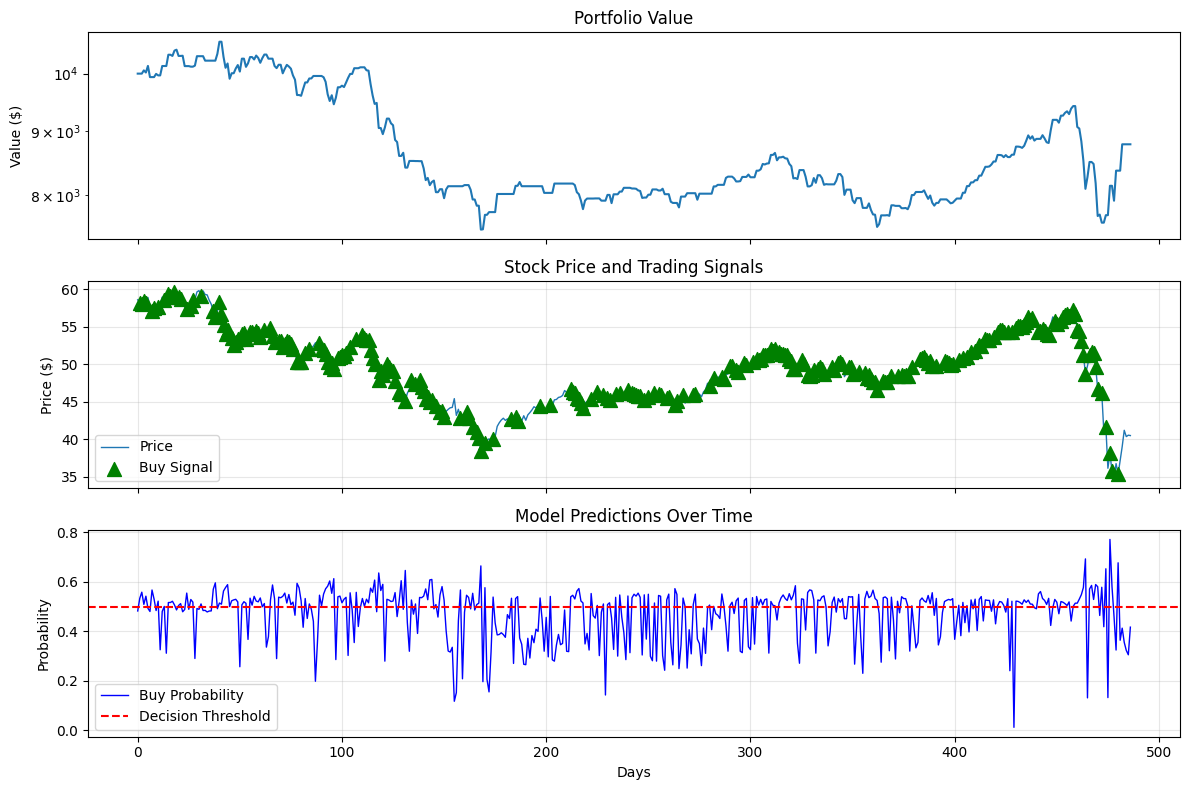

In [99]:
import matplotlib.pyplot as plt
# Plot price and trading decisions
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Plot 0: Portfolio value
ax0.plot(porftolio_values)
ax0.set_title('Portfolio Value')
ax0.set_yscale('log')
ax0.set_ylabel('Value ($)')

# Plot 1: Price and buy signals
ax1.plot(sequential_data.index, sequential_data['open'], label='Price', linewidth=1)
buy_indices = [i for i, d in enumerate(classifier_decisions) if d == 1]
buy_prices = [sequential_data.iloc[i]['open'] for i in buy_indices]
ax1.scatter(buy_indices, buy_prices, color='green', marker='^', s=100, label='Buy Signal', zorder=5)
ax1.set_ylabel('Price ($)')
ax1.set_title('Stock Price and Trading Signals')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Model predictions (probabilities)
with torch.no_grad():
    predictions = model(sequential_X)
    ax2.plot(sequential_data.index, predictions.numpy(), label='Buy Probability', color='blue', linewidth=1)
    ax2.axhline(y=0.5, color='red', linestyle='--', label='Decision Threshold')
    ax2.set_xlabel('Days')
    ax2.set_ylabel('Probability')
    ax2.set_title('Model Predictions Over Time')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Are the stock open prices reasonable in time? How do they relate to the model predictions and the performance of the classifier?

# Congratulations!

You've completed the Deep Learning and Finance with PyTorch introduction. We covered:

1. **Tensors**: PyTorch's fundamental data structure, similar to NumPy arrays but with GPU support
2. **Automatic Differentiation**: PyTorch automatically computes gradients using autograd
3. **Neural Networks**: Building neural networks using `nn.Module` and defining forward passes
4. **Training**: The complete training loop: forward pass, loss computation, backward pass, and weight updates
5. **Simple Application**: Training a CNN to classify CIFAR-10 images
6. **Financial Application**: Building a trading classifier for day to day decisions

### Possible variations to explore

- Experiment with different network architectures
- Try different optimizers (Adam, RMSprop)
- Adjust hyperparameters (learning rate, batch size, number of epochs)
- Explore other datasets
- Learn about more advanced topics: transfer learning, data augmentation, regularization
- Explore sequence models (LSTM, GRU) for time series data
- Study reinforcement learning for trading strategies

### Additional resources

- [PyTorch Official Tutorials](https://pytorch.org/tutorials/)
- [PyTorch Documentation](https://pytorch.org/docs/stable/index.html)
- [Deep Learning with PyTorch Book](https://pytorch.org/assets/deep-learning/Deep-Learning-with-PyTorch.pdf)
- [HuggingFace Datasets](https://huggingface.co/datasets)

Happy learning!

Pedro
